<a href="https://colab.research.google.com/github/Younesmoussaoui/chekpoints_SIC/blob/main/Chekpoints_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/sample_data/CC GENERAL (1).csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
print(df.shape)
df.columns

(8950, 18)


Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df['MINIMUM_PAYMENTS']

0        139.509787
1       1072.340217
2        627.284787
3               NaN
4        244.791237
           ...     
8945      48.886365
8946            NaN
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64

In [ ]:
df['MINIMUM_PAYMENTS'].fillna(round(df['MINIMUM_PAYMENTS'].mean()), inplace= True)
df['CREDIT_LIMIT'].fillna(round(df['CREDIT_LIMIT'].mean()), inplace= True)
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

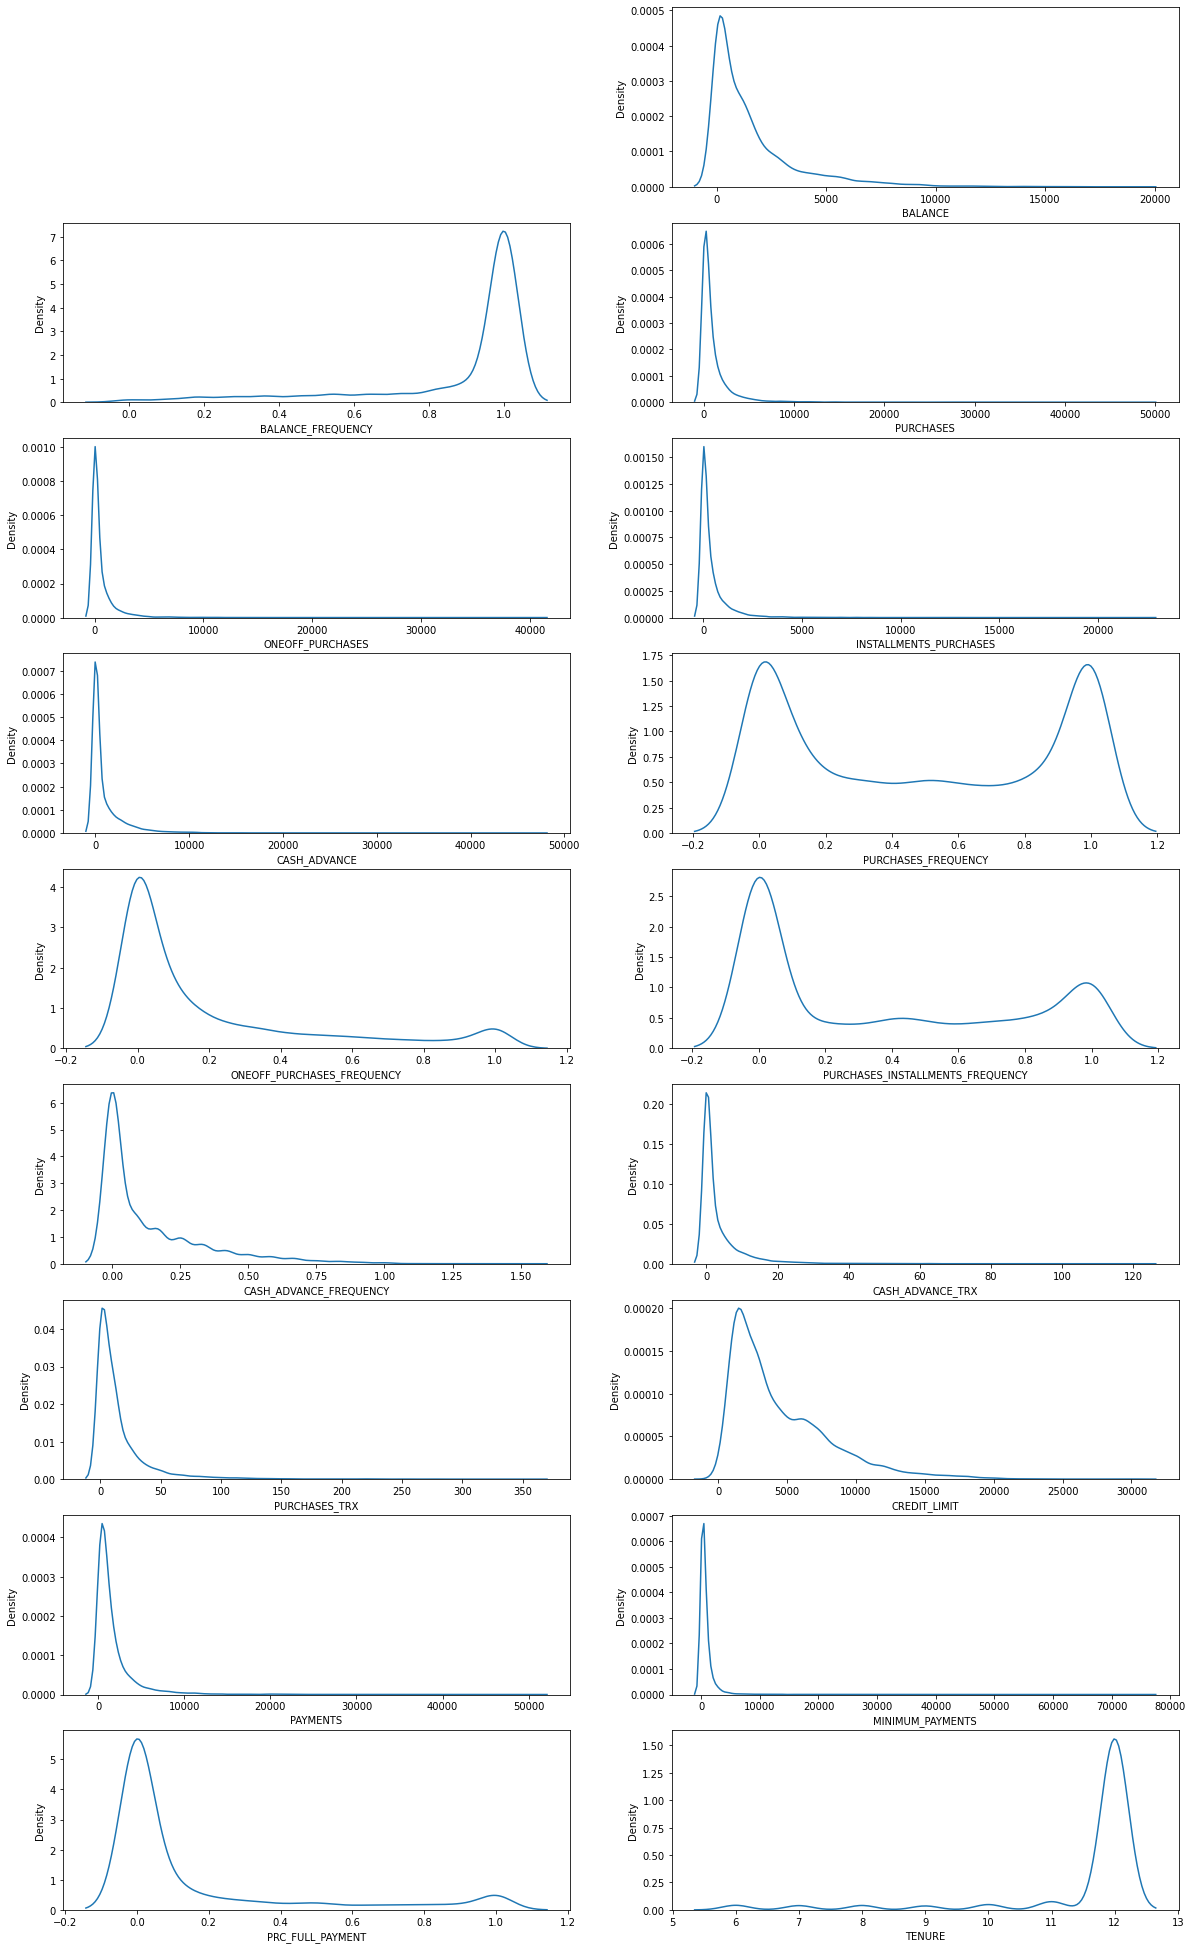

In [ ]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Il y a beaucoup d'asymétrie et elles sont variées. C'est en quelque sorte attendu des ensembles de données comme ceux-ci, car il y aura toujours quelques clients qui effectuent un très grand nombre de transactions.

In [ ]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


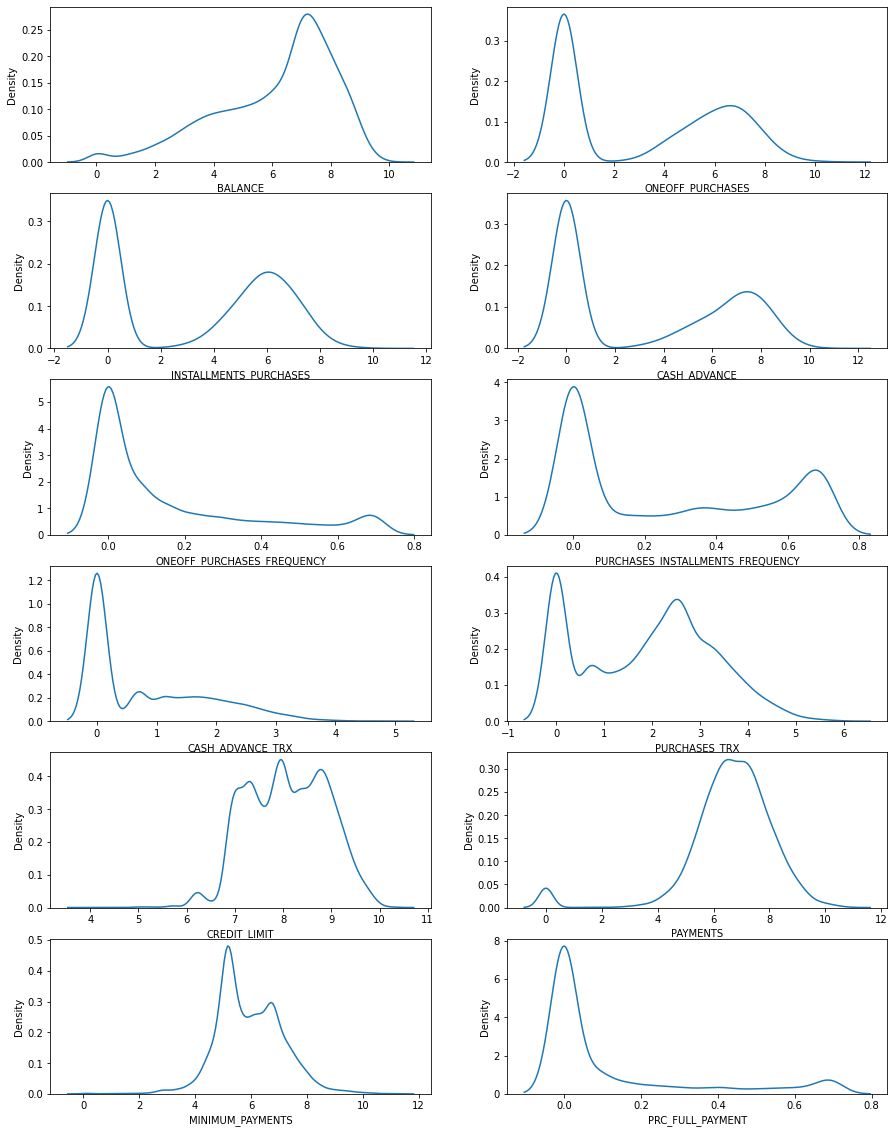

In [ ]:
for col in cols:
    df[col] = np.log(1 + df[col])
plt.figure(figsize=(15,20))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
plt.show()

 Ces graphes sont mieux que ce que nous avions et c'est notre travail en tant que data scientist d'aider notre modèle autant que possible 

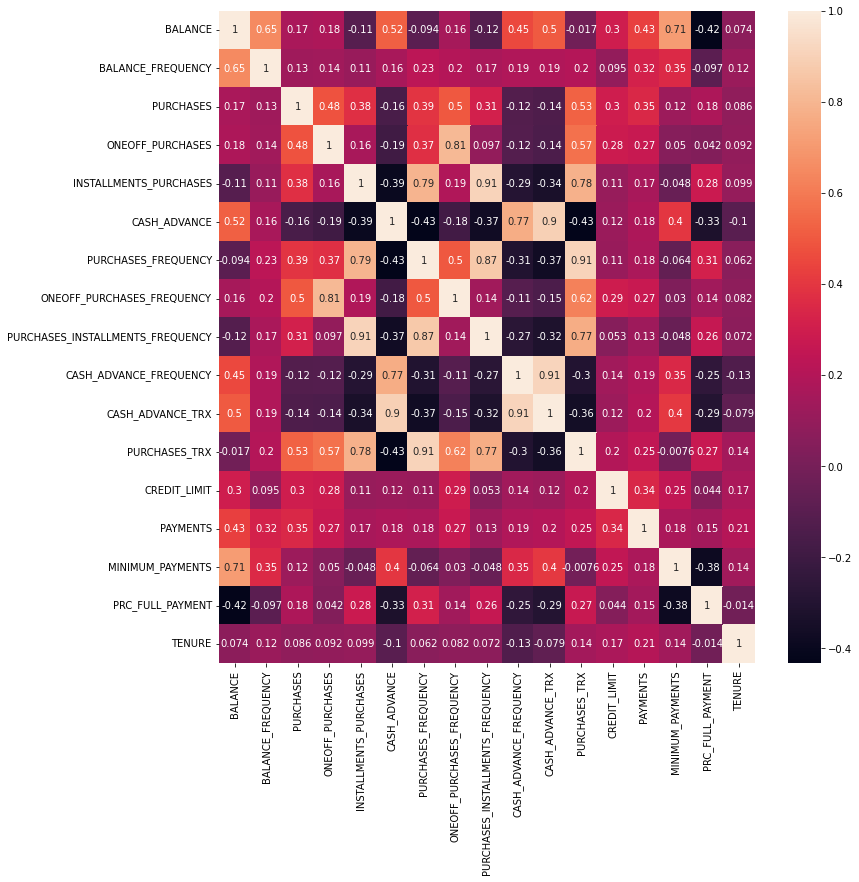

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Nous avons là quelques fonctionnalités corrélées , on va gerer cela avec la réduction de la dimensionnalité 

In [ ]:
from sklearn.decomposition import PCA
df.drop(['CUST_ID'], axis = 1, inplace = True)
pca = PCA(n_components=2)
X_red = pca.fit_transform(df)

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'average').fit(X_red)

In [ ]:
agglom.labels_

array([1, 1, 1, ..., 1, 1, 1])

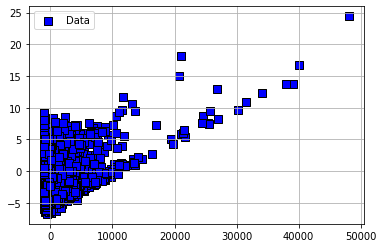

In [ ]:
plt.scatter(
    X_red[:, 0], X_red[:, 1],
    s=50, c='b',
    marker='s', edgecolor='black',
    label='Data'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

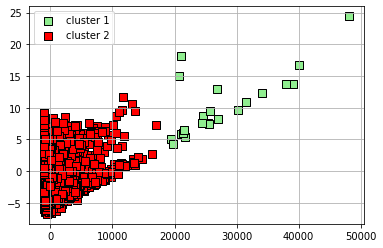

In [ ]:
plt.scatter(
    X_red[agglom.labels_ == 0, 0], X_red[agglom.labels_ == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
plt.scatter(
    X_red[agglom.labels_ == 1, 0], X_red[agglom.labels_ == 1, 1],
    s=50, c='red',
    marker='s', edgecolor='black',
    label='cluster 2'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


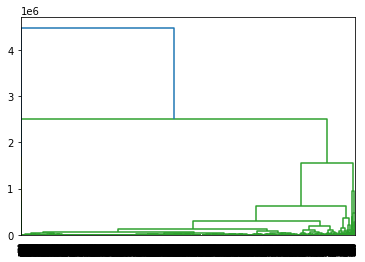

In [ ]:
dist_matrix = distance_matrix(X_red,X_red) 
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)

In [ ]:
  print('Silhoutte score of our model is ' + str(silhouette_score(X_red, agglom.labels_)))

Silhoutte score of our model is 0.9490838113033959


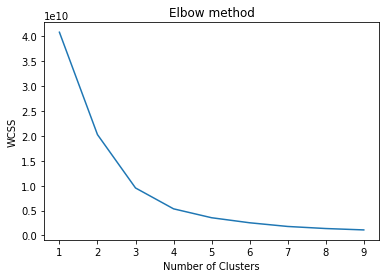

In [ ]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
for k in range(2,5):
  kmeans = KMeans(n_clusters=k, random_state=23)
  kmeans.fit(X_red)
  print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of our model is 0.8700352568272512
Silhoutte score of our model is 0.7984001689234911
Silhoutte score of our model is 0.7363959884568729


In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=23)
kmeans2.fit(X_red)

KMeans(n_clusters=2, random_state=23)

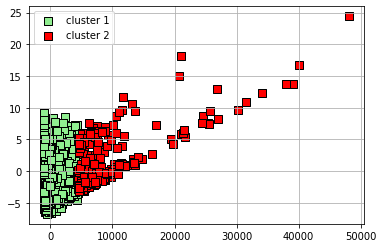

In [ ]:
plt.scatter(
    X_red[kmeans2.labels_ == 0, 0], X_red[kmeans2.labels_ == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
plt.scatter(
    X_red[kmeans2.labels_ == 1, 0], X_red[kmeans2.labels_ == 1, 1],
    s=50, c='red',
    marker='s', edgecolor='black',
    label='cluster 2'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()